In [1]:
import imageio
from mpl_toolkits.mplot3d import axes3d
from matplotlib.colors import LogNorm
from matplotlib import ticker
import itertools

# Project source files
from utils import *
from ols import *
from ridge import *
from logistic import *
from neural import *
from FeedForwardNeuralNetwork import *
from StochasticGradientDescent import *

In [101]:
# Setting up pyplot runtime configuration

from matplotlib.ticker import MaxNLocator

SMALL = 14
MEDIUM = 16
LARGE = 20
THICK = 4
THIN = 3
WIDE_FIG = (20,7.5)
TWO_TIMES_TWO = (20,15)
SMALL_FIG = (6,6)
OPACITY = .25


plt.style.context('fivethirtyeight')
plt.rc('axes', facecolor='#E6E6E6', edgecolor='black', axisbelow=True, grid=True)
plt.rc('grid', color='white', linestyle='solid')
plt.rc('lines', linewidth=THICK)

plt.rc('font', size=SMALL, weight='bold')          # default text sizes
plt.rc('axes', titlesize=MEDIUM)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM)    # legend fontsize
plt.rc('figure', titlesize=LARGE)  # fontsize of the figure title

COLORS = plt.rcParams['axes.prop_cycle'].by_key()['color']

<ipython-input-103-07ef0ed0b9d6>:4: RuntimeWarning: divide by zero encountered in true_divide
  return 1/i**k
<ipython-input-103-07ef0ed0b9d6>:4: RuntimeWarning: divide by zero encountered in true_divide
  return 1/i**k
<ipython-input-103-07ef0ed0b9d6>:4: RuntimeWarning: divide by zero encountered in true_divide
  return 1/i**k


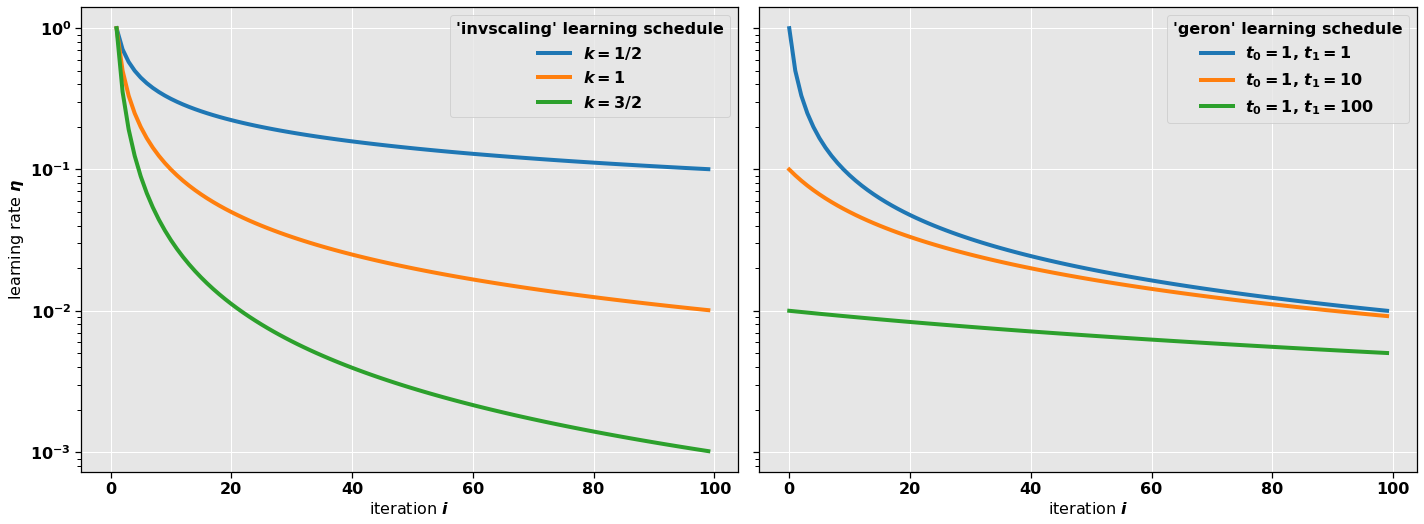

In [103]:
## Learning schedules

def invscaling(i, k):
    return 1/i**k

def geron(i, t1):
    return 1/(i + t1)

x = np.arange(100)

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=WIDE_FIG)
ax = axes[0]
ax.plot(x, invscaling(x, .5))
ax.plot(x, invscaling(x, 1))
ax.plot(x, invscaling(x, 1.5))
ax.legend(['$k=1/2$', '$k=1$', '$k=3/2$'], title=f"'invscaling' learning schedule", fontsize=MEDIUM, title_fontsize=MEDIUM, loc='upper right')
ax.set_yscale('log')

ax = axes[1]
ax.plot(x, geron(x, 1))
ax.plot(x, geron(x, 10))
ax.plot(x, geron(x, 100))
ax.legend(['$t_0=1$, $t_1=1$', '$t_0=1$, $t_1=10$', '$t_0=1$, $t_1=100$'], title=f"'geron' learning schedule", fontsize=MEDIUM, title_fontsize=MEDIUM, loc='upper right')
ax.set_yscale('log')

ax = axes[0]
ax.set_ylabel('learning rate $\eta$')
ax.set_xlabel('iteration $i$')

ax = axes[1]
ax.set_xlabel('iteration $i$')


plt.tight_layout()
plt.show()

In [289]:
n = 100
np.random.seed(0)
x = np.random.rand(n,1)
y = 1 + 2*x + .75*np.random.randn(n,1)
X = np.c_[np.ones(n), x]

ols = np.linalg.inv(X.T @ X) @ X.T @ y

sgd = SGD(epochs=20, batches=10, eta0=.5, learning_schedule='constant', regression='linear')
ols_sgd = sgd.run(X, y)

sgd = SGD(epochs=20, batches=10, eta0=.7, learning_schedule='constant', regression='linear')
ridge_sgd = sgd.run(X, y, lmd=.01)

#print('ols-inversion:\n', ols)
#print('ols-sgd:\n', ols_sgd)
#print('ridge-sgd:\n', ridge_sgd)

In [149]:
np.random.seed(0)
X = np.random.rand(3,3) + np.eye(3)
X = add_intercept(X)
Y = np.eye(3)
sgd = SGD(epochs=100, batch_size=1, eta0=.5, learning_schedule='constant', regression='logistic')
B = sgd.run(X, Y)
P = softmax(X @ B)

In [150]:
df = DataFrame()
df['case'] = ['1', '2', '3']
df['intercept'] = X[:,0].astype(np.int32)
df['$p_1$'] = X[:,1]
df['$p_2$'] = X[:,2]
df['$p_3$'] = X[:,3]
df['class 1'] = Y[:,0].astype(np.int32)
df['class 2'] = Y[:,1].astype(np.int32)
df['class 3'] = Y[:,2].astype(np.int32)
print(df.to_latex(index=False))

\begin{tabular}{lrrrrrrr}
\toprule
case &  intercept &     \$p\_1\$ &     \$p\_2\$ &     \$p\_3\$ &  class 1 &  class 2 &  class 3 \\
\midrule
   1 &          1 &  1.548814 &  0.715189 &  0.602763 &        1 &        0 &        0 \\
   2 &          1 &  0.544883 &  1.423655 &  0.645894 &        0 &        1 &        0 \\
   3 &          1 &  0.437587 &  0.891773 &  1.963663 &        0 &        0 &        1 \\
\bottomrule
\end{tabular}



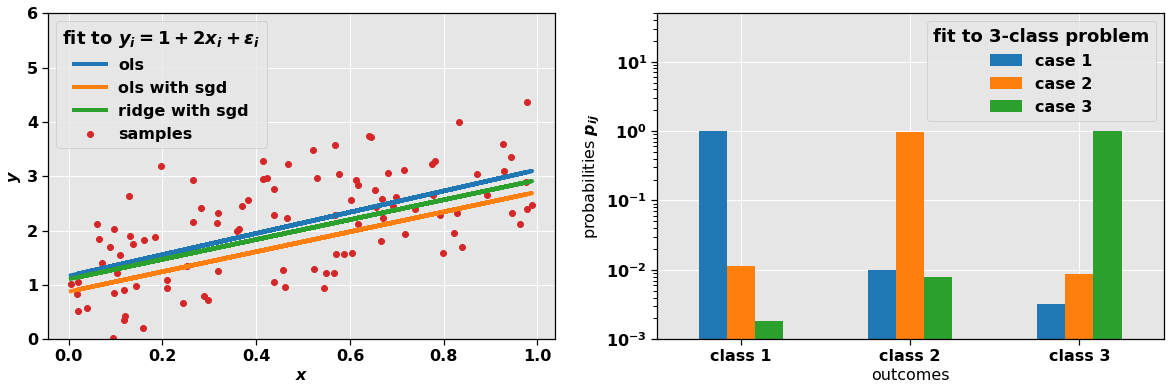

In [188]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=WIDE_FIG)
ax = axes[0]
ax.scatter(x, y, color=COLORS[3], label='samples')
ax.plot(x, ols[0]+ols[1]*x)
ax.plot(x, ols_sgd[0]+ols_sgd[1]*x)
ax.plot(x, ridge_sgd[0]+ridge_sgd[1]*x)
ax.set_ylim(0,6)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.legend(['ols', 'ols with sgd', 'ridge with sgd', 'samples'], title=r'fit to $y_i = 1 + 2x_i + \varepsilon_i$', loc='upper left')

ax = axes[1]
df = DataFrame()
df['case 1'] = P[0]
df['case 2'] = P[1]
df['case 3'] = P[2]
df['x'] = ['class 1','class 2','class 3']
df.plot(x='x', ax=ax, kind='bar', rot=0)
ax.set_xlabel('outcomes')
ax.set_ylabel('probabilities $p_{ij}$')
ax.set_yscale('log')
ax.set_ylim(.001,50)
ax.legend(title='fit to 3-class problem', loc='upper right')

plt.show()

In [284]:
n = 100
np.random.seed(0)
x = np.random.rand(n,1)
y = 1 + 2*x + .75*np.random.randn(n,1)
y_max = y.max()
y = y/y_max
X = np.c_[np.ones(n), x]

ols = np.linalg.inv(X.T @ X) @ X.T @ y

ffnn = FFNN(2, cost_function='mse')
ffnn.add_layer(2, activation_function='sigmoid')
ffnn.add_layer(1, activation_function='sigmoid')
ffnn.train(X, y, epochs=100, batch_size=10, eta0=.5, lmd=.0)

pred_lin = ffnn.predict(X)
pred_lin = pred_lin*y_max
y = y*y_max
ols = ols*y_max

In [287]:
np.random.seed(0)
X = np.random.rand(3,3) + np.eye(3)
X = add_intercept(X)
Y = np.eye(3)
ffnn = FFNN(4, cost_function='cross-entropy')
ffnn.add_layer(4, activation_function='relu')
ffnn.add_layer(3, activation_function='softmax')
ffnn.train(X, Y, epochs=100, batch_size=1, eta0=.1, lmd=.001)
P = ffnn.predict(X)

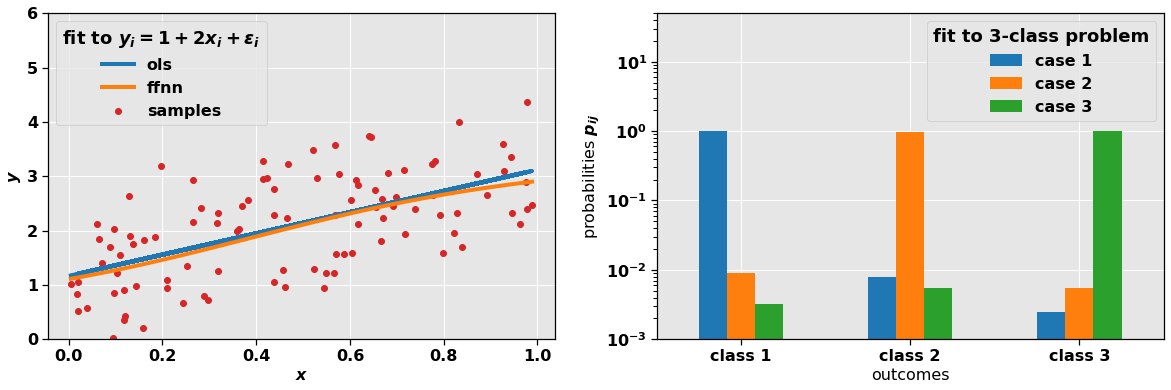

In [288]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=WIDE_FIG)
ax = axes[0]
ax.scatter(x, y, color=COLORS[3], label='samples')
ax.plot(x, ols[0]+ols[1]*x)
ax.plot(*zip(*sorted(zip(x, pred_lin))))
ax.set_ylim(0,6)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.legend(['ols', 'ffnn','samples'], title=r'fit to $y_i = 1 + 2x_i + \varepsilon_i$', loc='upper left')

ax = axes[1]
df = DataFrame()
df['case 1'] = P[0]
df['case 2'] = P[1]
df['case 3'] = P[2]
df['x'] = ['class 1','class 2','class 3']
df.plot(x='x', ax=ax, kind='bar', rot=0)
ax.set_xlabel('outcomes')
ax.set_ylabel('probabilities $p_{ij}$')
ax.set_yscale('log')
ax.set_ylim(.001,50)
ax.legend(title='fit to 3-class problem', loc='upper right')

plt.show()

In [15]:
n = 250
VAR_EPS = .03
MAX_PN = 12
POL_ORDERS = list(range(MAX_PN+1))
x, y = randmesh(sn=n, random_state=1)
z,_,_ = franke_sampler(x, y, var_eps=VAR_EPS)
X = make_design_matrix(x, y, pn=MAX_PN)

sgd = SGD(epochs=250, batch_size=10, eta0=.4, learning_schedule='constant')
df = run_ols_kfold(X, z, sgd, k=5, polynomial_orders=POL_ORDERS)
df

ep=50, bt=10, eta=0.01, xy=(2.00e+00,5.05e-02), R2=0.52
ep=50, bt=10, eta=0.1, xy=(9.00e+00,4.23e-02), R2=0.59
ep=50, bt=10, eta=0.25, xy=(5.00e+00,4.06e-02), R2=0.61
ep=50, bt=10, eta=0.4, xy=(2.00e+00,4.32e-02), R2=0.59
ep=50, bt=50, eta=0.01, xy=(5.00e+00,7.50e-02), R2=0.28
ep=50, bt=50, eta=0.1, xy=(8.00e+00,4.67e-02), R2=0.55
ep=50, bt=50, eta=0.25, xy=(5.00e+00,4.39e-02), R2=0.58
ep=50, bt=50, eta=0.4, xy=(2.00e+00,4.49e-02), R2=0.57
ep=250, bt=10, eta=0.01, xy=(6.00e+00,4.37e-02), R2=0.58
ep=250, bt=10, eta=0.1, xy=(5.00e+00,3.95e-02), R2=0.62
ep=250, bt=10, eta=0.25, xy=(4.00e+00,4.16e-02), R2=0.60


/home/olav/Documents/stud/FYS-STK4155/project2/source/utils.py:133: RuntimeWarning: overflow encountered in square
  return np.mean(np.mean((y - y_tilde)**2, axis=1, keepdims=True))
/home/olav/Documents/stud/FYS-STK4155/project2/source/StochasticGradientDescent.py:26: RuntimeWarning: overflow encountered in matmul
  return 2/n * X.T @ (X @ beta - y) + 2*lmd*beta
/home/olav/Documents/stud/FYS-STK4155/project2/source/StochasticGradientDescent.py:26: RuntimeWarning: invalid value encountered in matmul
  return 2/n * X.T @ (X @ beta - y) + 2*lmd*beta
/home/olav/Documents/stud/FYS-STK4155/project2/source/StochasticGradientDescent.py:26: RuntimeWarning: invalid value encountered in multiply
  return 2/n * X.T @ (X @ beta - y) + 2*lmd*beta


ep=250, bt=10, eta=0.4, xy=(2.00e+00,4.69e-02), R2=0.55
ep=250, bt=50, eta=0.01, xy=(2.00e+00,5.05e-02), R2=0.52
ep=250, bt=50, eta=0.1, xy=(8.00e+00,4.18e-02), R2=0.60
ep=250, bt=50, eta=0.25, xy=(6.00e+00,4.11e-02), R2=0.61


/home/olav/Documents/stud/FYS-STK4155/project2/source/utils.py:133: RuntimeWarning: overflow encountered in square
  return np.mean(np.mean((y - y_tilde)**2, axis=1, keepdims=True))
/home/olav/anaconda3/envs/fys-stk4155/lib/python3.8/site-packages/numpy/core/_methods.py:160: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)


ep=250, bt=50, eta=0.4, xy=(3.00e+00,4.41e-02), R2=0.58


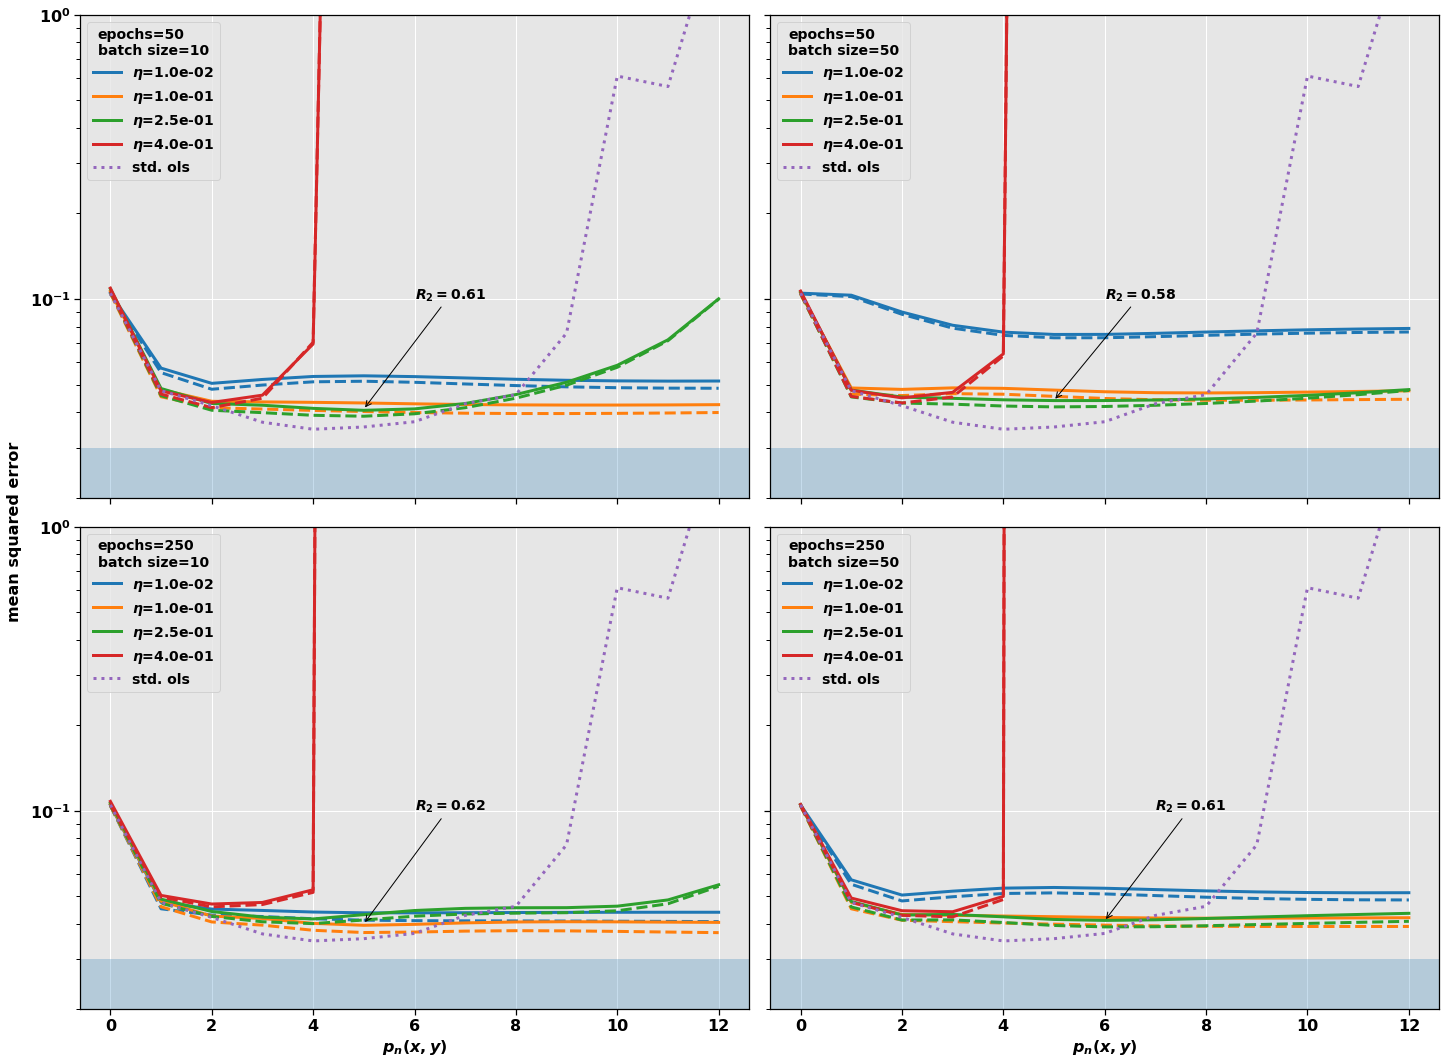

In [91]:
'''Plotting OLS with CV'''

fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=TWO_TIMES_TWO)
fig.text(-0.005, 0.5, 'mean squared error', va='center', rotation='vertical', fontsize=MEDIUM)

ylim = (2E-2, 1E-0)

epochs = [50,50,250,250]
batch_sizes = [10,50,10,50]
etas = [.01,.1,.25,.4]

df_inv = run_ols_kfold(X, z, k=5, polynomial_orders=POL_ORDERS)

for ax, ep, bt in zip(list(itertools.chain(*axes)), epochs, batch_sizes):
    for i, eta in enumerate(etas):
        sgd = SGD(epochs=ep, batch_size=bt, eta0=eta, learning_schedule='constant')
        df = run_ols_kfold(X, z, k=5, SGD=sgd, polynomial_orders=POL_ORDERS)
        ax.plot(POL_ORDERS, df['train_mse'], '--', linewidth=THIN, color=COLORS[i], label=None)
        ax.plot(POL_ORDERS, df['test_mse'], linewidth=THIN, color=COLORS[i], label=fr'$\eta$={eta:.1e}')
        
        # print best R2
        best_idx = df['test_mse'].argmin()
        best_mse_pn = POL_ORDERS[best_idx]
        best_mse_val = df['test_mse'].min()
        R2 = best_r2(df['test_mse'], z)
        print(f'ep={ep}, bt={bt}, eta={eta}, xy=({best_mse_pn:.2e},{best_mse_val:.2e}), R2={R2:.2f}')
    
    ax.plot(POL_ORDERS, df_inv['test_mse'], ':', linewidth=THIN, color=COLORS[i+1], label=fr'std. ols')
    
    ax.legend(title=f'epochs={ep}\nbatch size={bt}', loc='upper left', fontsize=SMALL, title_fontsize=SMALL)
    ax.set_ylim(*ylim)
    ax.set_yscale('log')
    ax.axhspan(plt.ylim()[0], VAR_EPS, alpha=OPACITY)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))


# Set x labels
ax = axes[1,0]
ax.set_xlabel(r"$p_n(x,y)$")
ax = axes[1,1]
ax.set_xlabel(r"$p_n(x,y)$")


# R2 annotations
ax = axes[0,0]
xytext = (5+1,.1)
xy = (5,4.1E-2)
R2 = .61
ax.annotate(f'$R_2 = {R2:.2f}$', xytext=xytext, xy=xy, arrowprops={'arrowstyle':'->'})

ax = axes[0,1]
xytext = (5+1,.1)
xy = (5,4.4E-2)
R2 = .58
ax.annotate(f'$R_2 = {R2:.2f}$', xytext=xytext, xy=xy, arrowprops={'arrowstyle':'->'})

ax = axes[1,0]
xytext = (5+1,.1)
xy = (5,4.0E-2)
R2 = .62
ax.annotate(f'$R_2 = {R2:.2f}$', xytext=xytext, xy=xy, arrowprops={'arrowstyle':'->'})

ax = axes[1,1]
xytext = (6+1,.1)
xy = (6,4.1E-2)
R2 = .61
ax.annotate(f'$R_2 = {R2:.2f}$', xytext=xytext, xy=xy, arrowprops={'arrowstyle':'->'})


plt.tight_layout()
plt.show()

In [96]:
'''Running Ridge with CV'''

lambdas = np.logspace(-7, -1, 7)
ridge_k_train_results = list()
ridge_k_test_results = list()

epochs = [50,50,250,250]
batch_sizes = [10,50,10,50]
etas = [.0001,.001,.01,.015]

for ep, bt in zip(epochs, batch_sizes):
    for eta in etas:
        sgd = SGD(epochs=ep, batch_size=bt, eta0=eta, learning_schedule='constant')
        ridge_k_df = run_ridge_kfold(X, z, k=5, SGD=sgd, polynomial_orders=POL_ORDERS, lambdas=lambdas)
        best_lambda, best_mse = best_lambda_mse(df=ridge_k_df, polynomial_orders=POL_ORDERS, col_prefix='train_mse_')
        ridge_k_train_results.append((ridge_k_df, best_lambda, best_mse))
        best_lambda, best_mse = best_lambda_mse(df=ridge_k_df, polynomial_orders=POL_ORDERS, col_prefix='test_mse_')
        ridge_k_test_results.append((ridge_k_df, best_lambda, best_mse))

In [97]:
ridge_k_df = run_ridge_kfold(X, z, k=5, polynomial_orders=POL_ORDERS, lambdas=lambdas)
_, best_mse_inv = best_lambda_mse(df=ridge_k_df, polynomial_orders=POL_ORDERS, col_prefix='test_mse_')

sgd = SGD(epochs=250, batch_size=10, eta0=.015, learning_schedule='constant')
lambdas = np.logspace(-6, -2, 5)
df = run_ridge_kfold(X, z, k=5, SGD=sgd, polynomial_orders=POL_ORDERS, lambdas=lambdas)
df

ep=50, bt=10, eta=0.0001, xy=(4.00e+00,1.65e-01), lmd=1.00e-07, R2=-0.59
ep=50, bt=10, eta=0.001, xy=(6.00e+00,4.92e-02), lmd=1.00e-07, R2=0.53
ep=50, bt=10, eta=0.01, xy=(6.00e+00,4.06e-02), lmd=1.00e-07, R2=0.61
ep=50, bt=10, eta=0.015, xy=(6.00e+00,4.00e-02), lmd=1.00e-07, R2=0.62
ep=50, bt=50, eta=0.0001, xy=(8.00e+00,2.20e-01), lmd=1.00e-07, R2=-1.11
ep=50, bt=50, eta=0.001, xy=(1.10e+01,1.25e-01), lmd=1.00e-07, R2=-0.20
ep=50, bt=50, eta=0.01, xy=(1.10e+01,4.43e-02), lmd=1.00e-07, R2=0.57
ep=50, bt=50, eta=0.015, xy=(9.00e+00,4.33e-02), lmd=1.00e-07, R2=0.58
ep=250, bt=10, eta=0.0001, xy=(8.00e+00,7.03e-02), lmd=1.00e-07, R2=0.33
ep=250, bt=10, eta=0.001, xy=(8.00e+00,4.20e-02), lmd=1.00e-07, R2=0.60
ep=250, bt=10, eta=0.01, xy=(4.00e+00,3.87e-02), lmd=1.00e-07, R2=0.63
ep=250, bt=10, eta=0.015, xy=(4.00e+00,3.84e-02), lmd=1.00e-07, R2=0.63
ep=250, bt=50, eta=0.0001, xy=(4.00e+00,1.65e-01), lmd=1.00e-07, R2=-0.59
ep=250, bt=50, eta=0.001, xy=(6.00e+00,4.93e-02), lmd=1.00e-07, R2=

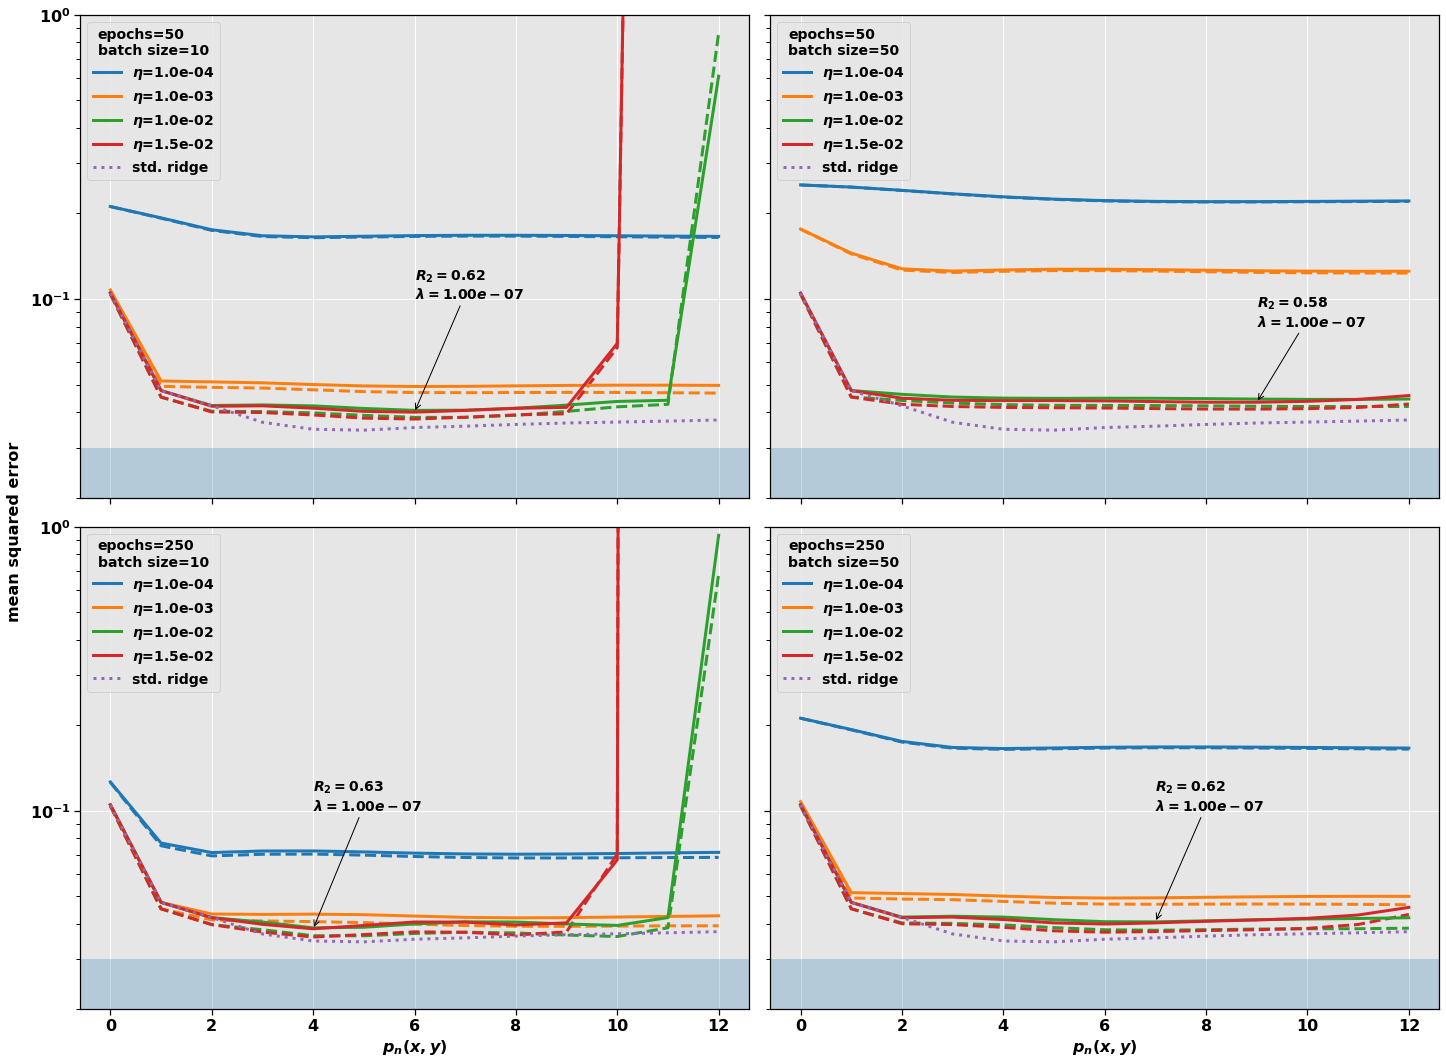

In [100]:
##### '''Plotting OLS with CV'''

fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=TWO_TIMES_TWO)
fig.text(-0.005, 0.5, 'mean squared error', va='center', rotation='vertical', fontsize=MEDIUM)

ylim = (2E-2, 1E-0)

k = 0
for ax, ep, bt in zip(list(itertools.chain(*axes)), epochs, batch_sizes):
    i = 0
    for result, eta in zip(ridge_k_train_results[k*len(etas):(k+1)*len(etas)], etas):
        _, _, best_mse = result
        ax.plot(POL_ORDERS, best_mse, '--', linewidth=THIN, color=COLORS[i], label=None)
        i += 1
    
    i = 0
    for result, eta in zip(ridge_k_test_results[k*len(etas):(k+1)*len(etas)], etas):
        _, best_lambda, best_mse = result
        ax.plot(POL_ORDERS, best_mse, linewidth=THIN, color=COLORS[i], label=fr'$\eta$={eta:.1e}')
        
        # print best R2
        best_idx = best_mse.argmin()
        best_mse_pn = POL_ORDERS[best_idx]
        best_mse_val = best_mse[best_idx]
        best_lambda_val = best_lambda[best_idx]
        R2 = best_r2(best_mse, z)
        print(f'ep={ep}, bt={bt}, eta={eta}, xy=({best_mse_pn:.2e},{best_mse_val:.2e}), lmd={best_lambda_val:.2e}, R2={R2:.2f}')
        i += 1
    
    ax.plot(POL_ORDERS, best_mse_inv, ':', linewidth=THIN, color=COLORS[i], label=fr'std. ridge')
    
    ax.legend(title=f'epochs={ep}\nbatch size={bt}', loc='upper left', fontsize=SMALL, title_fontsize=SMALL)
    ax.set_ylim(*ylim)
    ax.set_yscale('log')
    ax.axhspan(plt.ylim()[0], VAR_EPS, alpha=OPACITY)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    
    k += 1

# Set x labels
ax = axes[1,0]
ax.set_xlabel(r"$p_n(x,y)$")
ax = axes[1,1]
ax.set_xlabel(r"$p_n(x,y)$")


# R2 annotations
ax = axes[0,0]
xytext = (6,.1)
xy = (6.00e+00,4.00e-02)
R2 = .62
lmd = 1.00e-07
ax.annotate(f'$R_2 = {R2:.2f}$\n$\lambda = {lmd:.2e}$', xytext=xytext, xy=xy, arrowprops={'arrowstyle':'->'})

ax = axes[0,1]
xytext = (9,.08)
xy = (9.00e+00,4.33e-02)
R2 = .58
lmd = 1.00e-07
ax.annotate(f'$R_2 = {R2:.2f}$\n$\lambda = {lmd:.2e}$', xytext=xytext, xy=xy, arrowprops={'arrowstyle':'->'})

ax = axes[1,0]
xytext = (4,.1)
xy = (4.00e+00,3.84e-02)
R2 = .63
lmd = 1.00e-07
ax.annotate(f'$R_2 = {R2:.2f}$\n$\lambda = {lmd:.2e}$', xytext=xytext, xy=xy, arrowprops={'arrowstyle':'->'})

ax = axes[1,1]
xytext = (7,.1)
xy = (7.00e+00,4.06e-02)
R2 = .62
lmd = 1.00e-07
ax.annotate(f'$R_2 = {R2:.2f}$\n$\lambda = {lmd:.2e}$', xytext=xytext, xy=xy, arrowprops={'arrowstyle':'->'})

plt.tight_layout()
plt.show()

schedule=invscaling, eta=0.01, xy=(1.20e+01,1.15e-01), R2=-0.11
schedule=invscaling, eta=0.1, xy=(3.00e+00,5.50e-02), R2=0.47
schedule=invscaling, eta=0.25, xy=(9.00e+00,4.81e-02), R2=0.54
schedule=invscaling, eta=0.5, xy=(6.00e+00,4.50e-02), R2=0.57
schedule=invscaling, eta=1.0, xy=(6.00e+00,4.24e-02), R2=0.59
schedule=invscaling, eta=2.0, xy=(1.00e+00,4.79e-02), R2=0.54
schedule=geron, eta=0.01, xy=(1.20e+01,2.11e-01), R2=-1.02
schedule=geron, eta=0.1, xy=(1.20e+01,1.08e-01), R2=-0.04
schedule=geron, eta=0.25, xy=(6.00e+00,7.81e-02), R2=0.25
schedule=geron, eta=0.5, xy=(4.00e+00,6.32e-02), R2=0.39
schedule=geron, eta=1.0, xy=(2.00e+00,5.41e-02), R2=0.48
schedule=geron, eta=2.0, xy=(3.00e+00,4.87e-02), R2=0.53


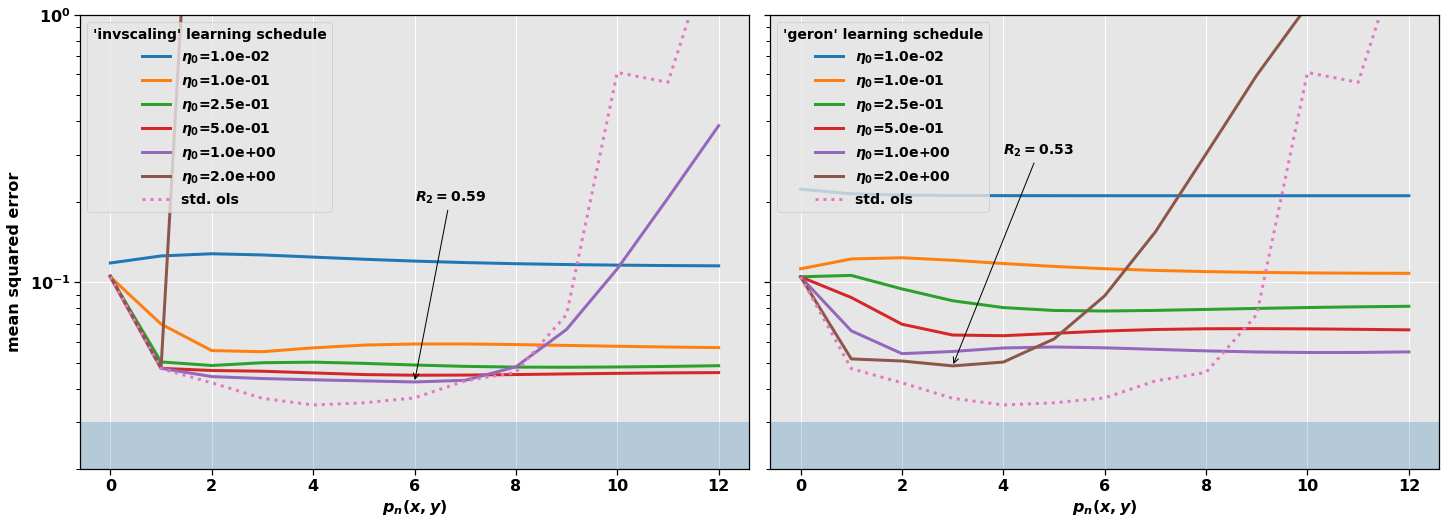

In [109]:
'''Plotting OLS with CV and various learning schedules'''

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=WIDE_FIG)
fig.text(-0.005, 0.5, 'mean squared error', va='center', rotation='vertical', fontsize=MEDIUM)

ylim = (2E-2, 1E-0)


schedules = ['invscaling', 'geron']
etas = [.01,.1,.25,.5,1.0,2.0]

df_inv = run_ols_kfold(X, z, k=5, polynomial_orders=POL_ORDERS)

for ax, schedule in zip(axes, schedules):
    for i, eta in enumerate(etas):
        sgd = SGD(epochs=50, batch_size=10, eta0=eta, learning_schedule=schedule)
        df = run_ols_kfold(X, z, k=5, SGD=sgd, polynomial_orders=POL_ORDERS)
        #ax.plot(POL_ORDERS, df['train_mse'], '--', linewidth=THIN, color=COLORS[i], label=None)
        ax.plot(POL_ORDERS, df['test_mse'], linewidth=THIN, color=COLORS[i], label=fr'$\eta_0$={eta:.1e}')
        
        # print best R2
        best_idx = df['test_mse'].argmin()
        best_mse_pn = POL_ORDERS[best_idx]
        best_mse_val = df['test_mse'].min()
        R2 = best_r2(df['test_mse'], z)
        print(f'schedule={schedule}, eta={eta}, xy=({best_mse_pn:.2e},{best_mse_val:.2e}), R2={R2:.2f}')
    
    ax.plot(POL_ORDERS, df_inv['test_mse'], ':', linewidth=THIN, color=COLORS[i+1], label=fr'std. ols')
    
    ax.legend(title=f"'{schedule}' learning schedule", loc='upper left', fontsize=SMALL, title_fontsize=SMALL)
    ax.set_ylim(*ylim)
    ax.set_yscale('log')
    ax.axhspan(plt.ylim()[0], VAR_EPS, alpha=OPACITY)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.set_xlabel(r"$p_n(x,y)$")


# R2 annotations
ax = axes[0]
xytext = (6,.2)
xy = (6.00e+00,4.24e-02)
R2 = .59
ax.annotate(f'$R_2 = {R2:.2f}$', xytext=xytext, xy=xy, arrowprops={'arrowstyle':'->'})

ax = axes[1]
xytext = (3+1,.3)
xy = (3.00e+00,4.87e-02)
R2 = .53
ax.annotate(f'$R_2 = {R2:.2f}$', xytext=xytext, xy=xy, arrowprops={'arrowstyle':'->'})


plt.tight_layout()
plt.show()